# Market Segmentation

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

## Load the data

In [114]:
data=pd.read_csv("29589028-3.12.Example.csv")
data

,\Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


In [115]:
data.describe()

,\Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


## Plot the data

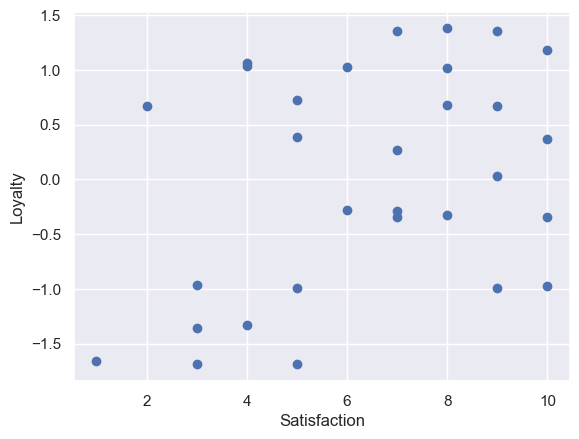

In [116]:
plt.scatter(data["\\Satisfaction"],data["Loyalty"])
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()

 Since the satisfaction values are higher KMeans will cluster based on Satisfaction

## Declaring variables

In [117]:
x=data.copy()

In [118]:
kmeans_new=KMeans(4)
kmeans_new.fit(x)
clusters=kmeans_new.fit_predict(x)

C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [119]:
data["Clusters"]=clusters

Text(0, 0.5, 'Loyalty')

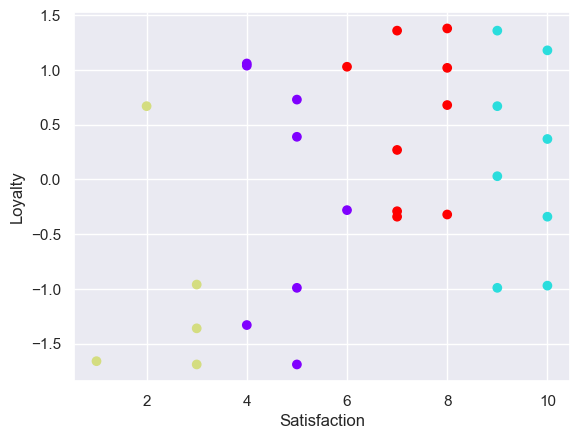

In [120]:
plt.scatter(data["\\Satisfaction"],data["Loyalty"],c=data["Clusters"],cmap="rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

See 4 segments are based on satisfation without including loyalty
this is because the scale of satisfaction is higher

## Standardization
To include both variables they need to be in same scaler or standardized

In [121]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)
print(x_scaled)

[[-0.93138063 -1.3318111 ]
 [-0.15523011 -0.28117124]
 [-0.54330537 -0.99160391]
 [ 0.23284516 -0.29117733]
 [-0.93138063  1.05964534]
 [-2.09560642 -1.6620122 ]
 [ 1.39707095 -0.97159172]
 [ 0.62092042 -0.32119561]
 [ 0.62092042  1.01962097]
 [ 0.62092042  0.67941378]
 [ 1.39707095 -0.3412078 ]
 [-0.54330537  0.38923705]
 [-0.54330537 -1.69203048]
 [-1.70753116  0.66940768]
 [ 0.23284516  0.26916393]
 [ 1.00899568  1.35982816]
 [ 0.62092042  1.37984035]
 [ 0.23284516  1.35982816]
 [ 0.23284516 -0.3412078 ]
 [ 1.00899568  0.66940768]
 [ 1.39707095  1.17971847]
 [-1.31945589 -1.69203048]
 [-0.93138063  1.03963316]
 [-1.31945589 -0.96158562]
 [-0.15523011  1.02962706]
 [ 1.00899568 -0.99160391]
 [ 1.39707095  0.36922486]
 [ 1.00899568  0.02901767]
 [-1.31945589 -1.36182938]
 [-0.54330537  0.72944425]]


## Elbow method

In [122]:
wcss=[]
for i in range(1,10):
    kmeans_temp=KMeans(i)
    kmeans_temp.fit_predict(x_scaled)
    wcss.append(kmeans_temp.inertia_)

C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\

## Plot

Text(0, 0.5, 'WCSS')

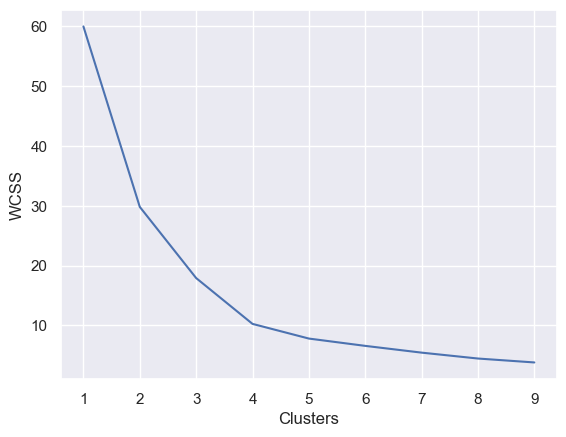

In [123]:
plt.plot(range(1,10),wcss)
plt.xlabel("Clusters")
plt.ylabel("WCSS")

I have choosed 4 as no of clusters

In [124]:
kmeans_new=KMeans(4)
kmeans_new.fit(x_scaled)
new_clusters=kmeans_new.fit_predict(x_scaled)

C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [125]:
data["New Clusters"]=new_clusters

Text(0, 0.5, 'Loyalty')

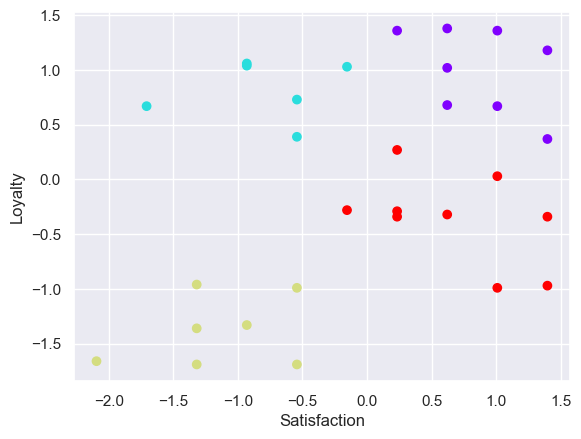

In [126]:
plt.scatter(x_scaled[:,0],data["Loyalty"],c=data["New Clusters"],cmap="rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

Now we have considered both loyalty and satisfaction